<a href="https://colab.research.google.com/github/jmz67/LearnPytorch/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [40]:
## create a model that inherit nn.Model
class Model(nn.Module):
    ## input layer(4 features of the flower)
    ## --> Hidden layer1 (number of neurons)
    ## --> H2(n)
    ## --> output(3 classes of iris flowers)
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        super().__init__() # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)

      return x


In [41]:
# Pick a manual seed for randomization
torch.manual_seed(41)

#Create an instance of model
model = Model()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [31]:
my_df
## my_df.head()
## my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
# change last column from string to integers
my_df['species'] = my_df['species'].map({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [33]:
# train test split ! set X, y
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [34]:
# convert these to numpy arrays
X = X.values
y = y.values

In [35]:
from sklearn.model_selection import train_test_split

In [50]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [51]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [52]:
# convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [53]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [54]:
# train our model
# epochs(one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train)

  # measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 50 epochs
  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')

  # do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weight
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 0.020819999277591705
Epoch 10 and loss 0.022082632407546043
Epoch 20 and loss 0.0189205314964056
Epoch 30 and loss 0.019061097875237465
Epoch 40 and loss 0.0184794832020998
Epoch 50 and loss 0.017369767650961876
Epoch 60 and loss 0.016883285716176033
Epoch 70 and loss 0.016254426911473274
Epoch 80 and loss 0.015687773004174232
Epoch 90 and loss 0.01514490507543087


Text(0.5, 0, 'epoch')

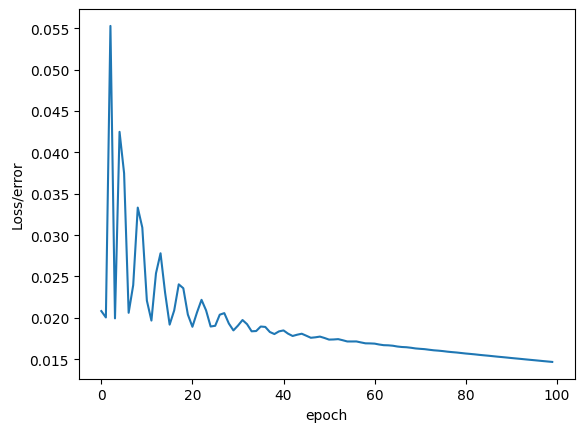

In [56]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('epoch')

In [57]:
# evaluate model on test data set (validate model on test set)
with torch.no_grad(): # bascically turn off back propagation
  y_val = model.forward(X_test)
  loss = criterion(y_val, y_test)

In [58]:
loss

tensor(0.1488)

In [64]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'setosa'
    elif y_test[i] == 1:
      x = 'versicolor'
    else:
      x = 'virginica'

    # will tell us what type of flower classes our network thinks it is
    print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'Accuracy: {correct}/{len(X_test)}')

1. tensor([-14.9995,   6.5200,   9.3996]) 	 2 	 2
2. tensor([-21.5018,   3.6648,  18.2480]) 	 2 	 2
3. tensor([-25.1845,   4.1675,  21.3728]) 	 2 	 2
4. tensor([-9.6883, 10.4547,  0.7218]) 	 1 	 1
5. tensor([-20.6165,   5.2153,  15.9787]) 	 2 	 2
6. tensor([-7.1377, 11.1646, -2.4315]) 	 1 	 1
7. tensor([-16.0189,   6.9006,  10.0185]) 	 2 	 2
8. tensor([-9.8553, 10.4004,  0.9277]) 	 1 	 1
9. tensor([-18.2735,   6.0562,  12.9595]) 	 2 	 2
10. tensor([-23.2120,   3.5280,  20.0782]) 	 2 	 2
11. tensor([-14.8811,   7.2906,   8.5815]) 	 2 	 2
12. tensor([ 17.0989,   0.3367, -16.6812]) 	 0 	 0
13. tensor([ 16.8758,  -0.1503, -15.9995]) 	 0 	 0
14. tensor([-3.4210,  9.1927, -3.9584]) 	 1 	 1
15. tensor([ 12.5604,   2.3749, -13.9383]) 	 0 	 0
16. tensor([-13.4700,   8.3571,   6.2727]) 	 2 	 1
17. tensor([ 15.7085,   0.6788, -15.5713]) 	 0 	 0
18. tensor([-14.6666,   6.9448,   8.7047]) 	 1 	 2
19. tensor([ 17.1803,   0.0897, -16.5315]) 	 0 	 0
20. tensor([ 13.0707,   1.5265, -13.6826]) 	 0 	 0
2

In [65]:
new_iris = torch.tensor([5.1, 3.3, 1.7, 0.5])

In [67]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 12.5604,   2.3749, -13.9383])


In [68]:
# save our nn model
torch.save(model.state_dict(), 'iris_model.pt')

In [69]:
# load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [71]:
# make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)